<a href="https://colab.research.google.com/github/kjxeez/machine-learning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы машинного обучения – Лабораторная работа №4

# Нейронные сети MLP

Студент: Акопян Изабелла Арменовна
НБИбд-01-20

Лабораторная работа 4 – Вариант 9 

1. Набор данных: diamonds 

2. Независимые признаки: carat, depth 

3. Метка класса: color 

4. Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32. 

Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.
 
Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных. 

Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.  

Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки. 

Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках. 

Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом. 

Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети.  

Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных. 

Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке. 
Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. 

__Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса.__

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [141]:
ds = tfds.load("diamonds", split='train')



In [142]:
df = tfds.as_dataframe(ds)
df.head()

,features/carat,features/clarity,features/color,features/cut,features/depth,features/table,features/x,features/y,features/z,price
0,1.26,2,4,2,60.599998,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.099998,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.700001,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.000000,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.200001,54.0,4.43,4.45,2.76,646.0


Независимые признаки: carat, depth

Метка класса: color

In [143]:
df = df[['features/carat','features/depth','features/color']]
df.head()

,features/carat,features/depth,features/color
0,1.26,60.599998,4
1,0.80,62.099998,4
2,0.56,61.700001,2
3,1.51,64.000000,6
4,0.33,62.200001,5


__Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.__

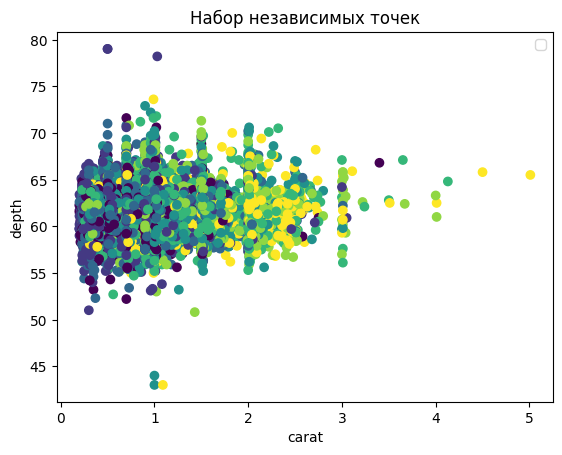

In [144]:
plt.scatter(df['features/carat'], df['features/depth'], c = df['features/color'])
plt.title('Набор независимых точек')
plt.xlabel('carat')
plt.ylabel('depth')
plt.legend()

__Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.__

In [145]:
class_mapping = {
    0:1,
    4: 0,  
    2: 0,
    6:0,
    5:0,
    3: 1,
    1:1
}

In [146]:
df['features/color']=df['features/color'].map(class_mapping)

<ipython-input-146-4f542afd0d27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features/color']=df['features/color'].map(class_mapping)


In [147]:
df['features/color'].unique()

array([0, 1])

In [148]:
len(df['features/color'])

53940

In [149]:
df['features/color'].value_counts()

1    27864
0    26076
Name: features/color, dtype: int64

*почти 50 к 50*


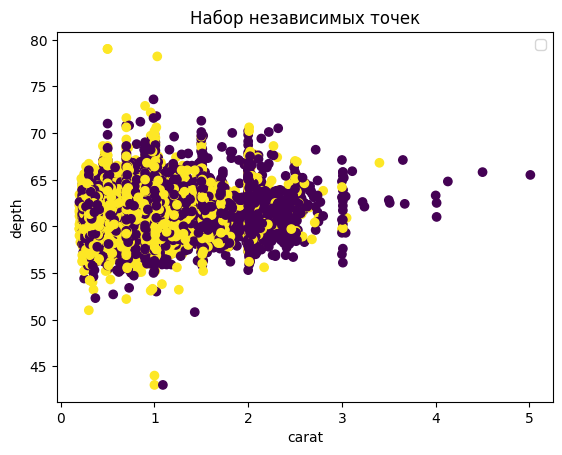

In [152]:
plt.scatter(df['features/carat'], df['features/depth'], c = df['features/color'])
plt.title('Набор независимых точек')
plt.xlabel('carat')
plt.ylabel('depth')
plt.legend()

__Разбейте набор данных из двух признаков и меток класса на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите ее на обучающей выборке. Оцените качество бинарной классификации при помощи матрицы ошибок для тестовой выборки.__

Параметры глубокой нейронной сети: кол-во скрытых слоев – 5, кол-во нейронов в скрытом слое – 32.

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['features/carat','features/depth']],df['features/color'], test_size=0.4, random_state=42)

In [156]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)

model = tf.keras.Sequential([
  
    feature_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),   #5 скрытых слоев
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-2),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_26 (Normaliza  (None, 2)                3         
 tion)                                                           
                                                                 
 dense_113 (Dense)           (None, 32)                96        
                                                                 
 dense_114 (Dense)           (None, 32)                1056      
                                                                 
 dense_115 (Dense)           (None, 32)                1056      
                                                                 
 dense_116 (Dense)           (None, 32)                1056      
                                                                 
 dense_117 (Dense)           (None, 32)                1056      
                                                     

In [157]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=50,
    callbacks=[callback],
    batch_size=32
)

Epoch 1/50
1012/1012 [==============================] - 5s 3ms/step - loss: 0.6930 - accuracy: 0.5116 - val_loss: 0.6930 - val_accuracy: 0.5170
Epoch 2/50
1012/1012 [==============================] - 4s 4ms/step - loss: 0.6928 - accuracy: 0.5155 - val_loss: 0.6934 - val_accuracy: 0.4830
Epoch 3/50
1012/1012 [==============================] - 3s 3ms/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6926 - val_accuracy: 0.5170
Epoch 4/50
1012/1012 [==============================] - 3s 3ms/step - loss: 0.6928 - accuracy: 0.5159 - val_loss: 0.6927 - val_accuracy: 0.5170
Epoch 5/50
1012/1012 [==============================] - 3s 3ms/step - loss: 0.6929 - accuracy: 0.5142 - val_loss: 0.6927 - val_accuracy: 0.5170
Epoch 6/50
1012/1012 [==============================] - 3s 3ms/step - loss: 0.6929 - accuracy: 0.5159 - val_loss: 0.6926 - val_accuracy: 0.5170
Epoch 7/50
1012/1012 [==============================] - 3s 3ms/step - loss: 0.6928 - accuracy: 0.5126 - val_loss: 0.6927 - val_accuracy:

In [158]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

675/675 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.5170


(0.6929195523262024, 0.5169633030891418)

__Визуализируйте границы принятия решений построенной нейронной сетью на обучающей и тестовой выборках.__

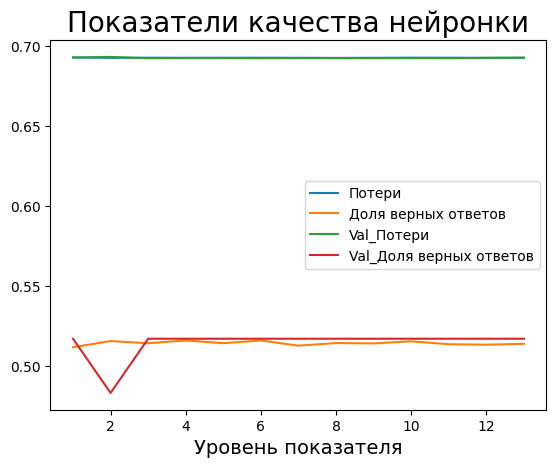

In [160]:
plt.plot(np.arange(1, len(history.history['loss'])+1), history.history['loss'], label='Потери')
plt.plot(np.arange(1, len(history.history['accuracy'])+1),history.history['accuracy'], label='Доля верных ответов')
plt.plot(np.arange(1, len(history.history['val_loss'])+1), history.history['val_loss'], label='Val_Потери')
plt.plot(np.arange(1, len(history.history['val_accuracy'])+1),history.history['val_accuracy'], label='Val_Доля верных ответов')
plt.title('Показатели качества нейронки', size=20)
plt.xlabel('Эпохи', size=14)
plt.xlabel('Уровень показателя', size=14)
plt.legend();

820/820 [==============================] - 1s 2ms/step


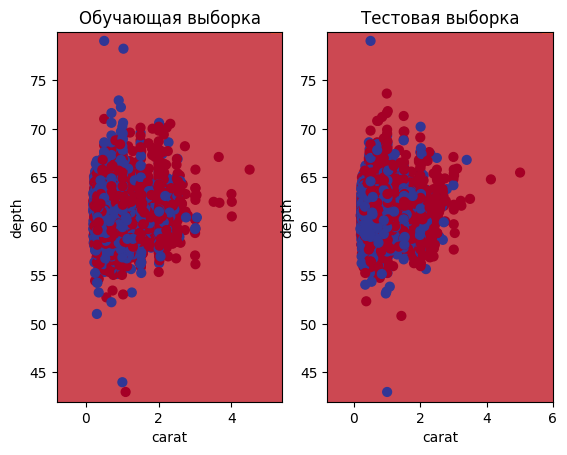

In [161]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Получаем предсказания для каждой точки сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Рисуем контурный график разделения
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    
    # Визуализируем точки двух классов
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    
    # Добавляем названия осей
    plt.xlabel('carat')
    plt.ylabel('depth')

plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model, X=X_test, y=y_test)

выше графики красные, тк классы сильно разбросаны и видимо красный сильно повлиял

In [162]:
from sklearn.metrics import confusion_matrix
y_pred_binary = model.predict(X_train).round()
confusion_matrix(y_train, y_pred_binary)

1012/1012 [==============================] - 1s 1ms/step


array([[    0, 15654],
       [    0, 16710]])

__Визуализируйте ROC-кривую для построенного классификатора и вычислите площадь под ROC-кривой методом трапеций или иным методом.__

In [163]:
from sklearn.metrics import roc_auc_score,roc_curve

675/675 [==============================] - 2s 3ms/step


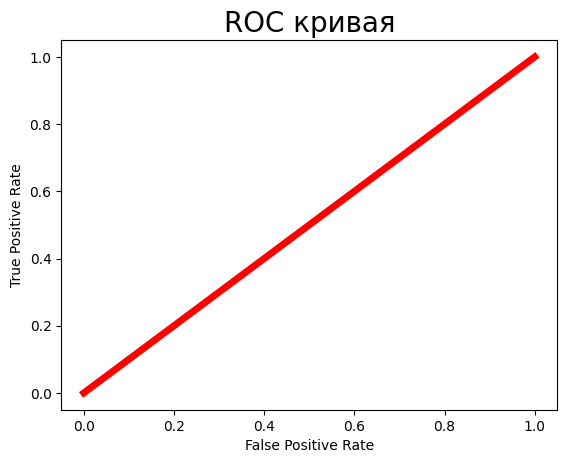

ROC-AUC score: 0.5


In [165]:
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='r', lw=5)
plt.title('ROC кривая', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC score:', roc_auc)

думаю, что значение ROC_AUC получилось таким потому, что я делила классы просто по принципу количества, а не по сходству значений

__Обучите на полном наборе данных нейронную сеть с одним слоем и одним выходным нейроном с функцией активации сигмоида и определите дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и являющийся важным по абсолютному значению веса в обученной нейронной сети.__

In [166]:
df2 = tfds.as_dataframe(ds)
X = np.array(df2.drop('features/color', axis=1))
y = np.array(df['features/color'])

In [167]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X.shape[1],)) 
feature_normalizer.adapt(X)

In [168]:
model_aux = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_aux.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_27 (Normaliza  (None, 9)                3         
 tion)                                                           
                                                                 
 dense_119 (Dense)           (None, 1)                 10        
                                                                 
Total params: 13
Trainable params: 10
Non-trainable params: 3
_________________________________________________________________


In [170]:
model_aux.compile(loss=tf.keras.losses.binary_crossentropy)
model_aux.fit(X, y, epochs=50, verbose=1);

Epoch 1/50
1686/1686 [==============================] - 72s 2ms/step - loss: 0.6856
Epoch 2/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 3/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 4/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 5/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 6/50
1686/1686 [==============================] - 3s 2ms/step - loss: 0.6856
Epoch 7/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 8/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6855
Epoch 9/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 10/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 11/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856
Epoch 12/50
1686/1686 [==============================] - 2s 1ms/step - loss: 0.6856


In [171]:
model_aux.layers[1].kernel

<tf.Variable 'dense_119/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.71478343],
       [ 0.3165862 ],
       [-0.30744857],
       [ 0.37478232],
       [-0.319345  ],
       [-0.21834116],
       [-0.39124644],
       [ 0.52470416],
       [-0.11157317]], dtype=float32)>

In [172]:
columns=df2.columns
columns

Index(['features/carat', 'features/clarity', 'features/color', 'features/cut',
       'features/depth', 'features/table', 'features/x', 'features/y',
       'features/z', 'price'],
      dtype='object')

In [175]:
import numpy as np

print(columns[-2]) #у него вес 0.525

features/z


__Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.__

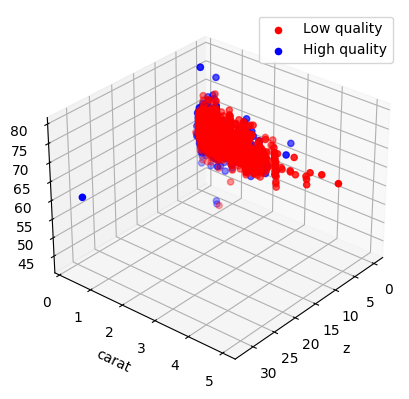

In [180]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['features/z'][y==0], df2['features/carat'][y==0], df2['features/depth'][y==0], c='r', label='Low quality')
ax.scatter(df2['features/z'][y==1], df2['features/carat'][y==1], df2['features/depth'][y==1], c='b', label='High quality')

# Подписываем оси и добавляем легенду
ax.set_xlabel('z')
ax.set_ylabel('carat')
ax.set_zlabel('depth')
ax.legend()
ax.view_init(30, 40)
plt.show()

__Разбейте полный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть с нормализующим слоем и параметрами, указанными в индивидуальном задании, для многоклассовой классификации и обучите ее на обучающей выборке.__

In [181]:
X=df2.drop('features/color',axis=1)
y=df2['features/color']
y.unique()

array([4, 2, 6, 5, 3, 1, 0])

In [182]:
def to_one_hot(labels, dimension=7):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label-3] = 1.
    return results

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
print(X_train.shape, y_test.shape)
y_train = to_one_hot(y_train,7)
y_test = to_one_hot(y_test,7)
y_test.shape

(36139, 9) (17801,)


(17801, 7)

In [185]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(X_train.shape[1],)) 
feature_normalizer.adapt(X_train)

model = tf.keras.Sequential([

    feature_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),    #5 скрытых слоев с 32 нейронами
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=50,
    batch_size=32
)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_29 (Normaliza  (None, 9)                3         
 tion)                                                           
                                                                 
 dense_125 (Dense)           (None, 32)                320       
                                                                 
 dense_126 (Dense)           (None, 32)                1056      
                                                                 
 dense_127 (Dense)           (None, 32)                1056      
                                                                 
 dense_128 (Dense)           (None, 32)                1056      
                                                                 
 dense_129 (Dense)           (None, 32)                1056      
                                                     

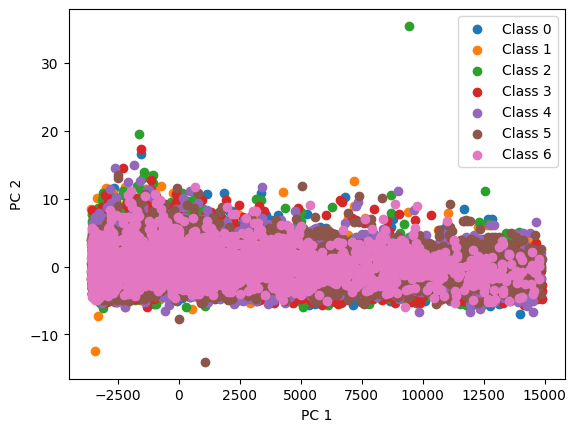

In [186]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Преобразуем признаковое пространство при помощи PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Рисуем точки обучающей выборки
for i in range(7):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label='Class {}'.format(i))

# Подписываем оси и добавляем легенду
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

На оси PC1 отражается большое количество изменчивости данных, а на оси PC2 добавляется нюансировка этой изменчивости.




__Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.__

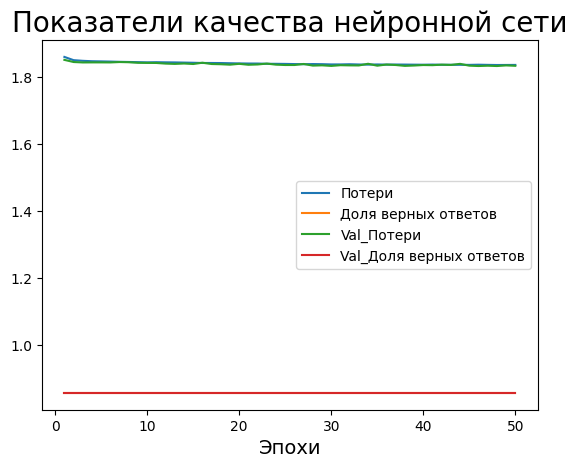

In [187]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(np.arange(1, len(loss)+1), loss, label='Потери')
plt.plot(np.arange(1, len(acc)+1),acc, label='Доля верных ответов')
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label='Val_Потери')
plt.plot(np.arange(1, len(val_acc)+1),val_acc, label='Val_Доля верных ответов')
plt.title('Показатели качества нейронной сети', size=20)
plt.xlabel('Эпохи', size=14)
plt.legend();

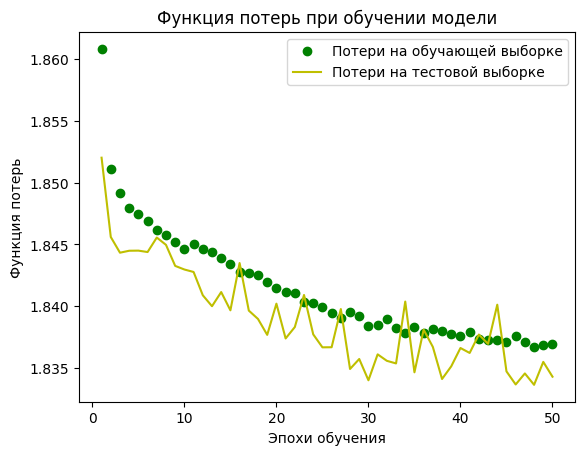

In [190]:
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "go", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "y", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();